In [3]:
#importing libraries
import pandas as pd #used for reading the csv file
import matplotlib.pyplot as plt #used for plotting the signls
import numpy as num #used for complex numbers and mathematical function

In [4]:
#reading data from the csv file
signals_data=pd.read_csv("data.csv")
signals_data['index']=signals_data.index
# extraction of data takes place
x=signals_data["x[n]"]
y=signals_data["y[n]"]

In [5]:
# defining h[n] as impulse response having values for (n=-2,-1,0,1,2)
h=[1/16,1/4,3/8,1/4,1/16]

In [6]:
#function defined for denoising the signal
def denoising(impulse1):

        Y = DTFT(impulse1, 193)
        signal = []
        for j in Y:
            st = abs(j)
            if st < 50:
                signal.append(0)
            else:
                signal.append(j)
        return IDTFT(signal,193)

In [7]:
# calculating DTFT of the x[n]
def DTFT(impulse1,N):
    impulse2=[]
    for i in range(N):
        D=0
        for j in range(0,len(impulse1)):
            impulse=impulse1[j]*num.exp(complex(0,(-2*i*num.pi*(j)/N)))
            D+=impulse
        impulse2.append(D)
    return impulse2

In [8]:
#calculating inverse Discrete time Fourier Transform
def IDTFT(impulse2,N):
    impulse1=[]
    for n in range(N):
        ID=0
        for k in range(0,N):
            impulse=impulse2[k]*num.exp(complex(0,(k*2*num.pi*n)/N))/N
            ID+=impulse

        impulse1.append(ID)
    return impulse1

In [9]:
#function defined from deblurring
def deblurring(signal1,signal2):
    T=[]
    Imp1=DTFT(signal1,193)
    Imp2=DTFT(signal2,193)
    for j in range(193):
        if abs(Imp2[j])<=0.01:
            t=Imp2[j]/0.01
            T.append(t)
        else:
            t=Imp1[j]/Imp2[j]
            T.append(t)
    return T

In [10]:
def STD(x,y):#for comparing both the method
    mistake=0
    for i in range(len(x)):
        mistake = mistake+ (y[i]-x[i])**2
    print('Standard Deviation: ', end=' ')
    print((mistake**(0.5)/len(signals_data['y[n]'])).real)
    print('Root Mean Square Error: ', end=' ')
    print((mistake**(0.5)).real)

In [11]:
#for designing x1[n] from  original
den1=denoising(y)
deb1=deblurring(den1,h)
inv1=IDTFT(deb1,193)

x1=inv1

#for designing x2[n] from original
deb2=deblurring(y,h)
inv2=IDTFT(deb2,193)
den2=denoising(inv2)

x2=den2

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


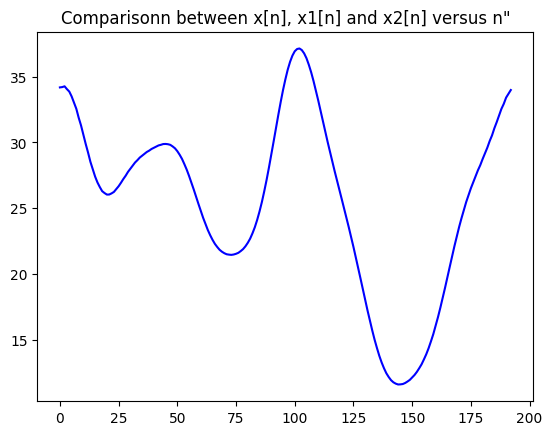

In [12]:
plt.title('Comparisonn between x[n], x1[n] and x2[n] versus n"')
plt.plot(x1,label="x1[n]",color="blue") # signal undergoes denoising then deblurring

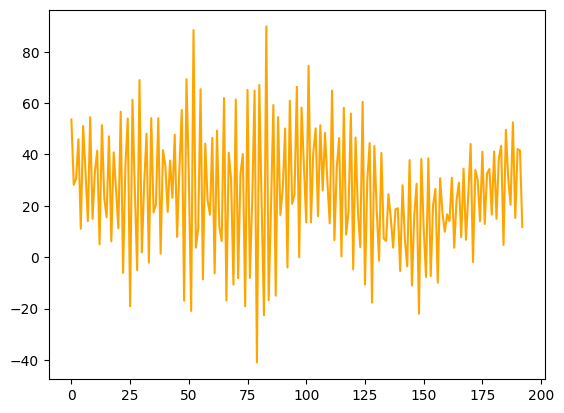

In [13]:
plt.plot(x2,label="x2[n]",color="orange") #signal umdergoes deblurring then denoising

Standard Deviation:  0.11019406937620377
Root Mean Square Error:  21.267455389607328
Standard Deviation:  1.6772470437556621
Root Mean Square Error:  323.7086794448428


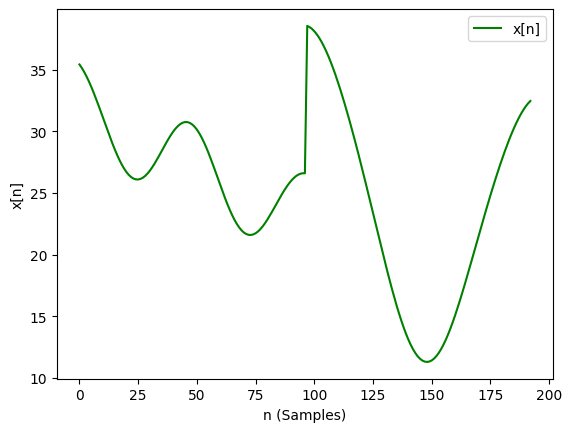

In [14]:
plt.plot(x,label="x[n]",color="green") #Original signal
plt.legend()
plt.ylabel("x[n]")
plt.xlabel("n (Samples)")
STD(x1,x)
STD(x2,x)
plt.show()#showing the graph plot